In [1]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.metrics import classification_report, plot_confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, LSTM, Bidirectional, TimeDistributed

# Import TensorBoard
from tensorflow.keras.callbacks import TensorBoard


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'veinData' 

In [3]:
earData = pd.read_csv(f'matlab_3/{file_name}.csv', header=None)

In [4]:
earData

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,-0.956749,-1.029626,-1.017856,-0.855469,-0.639826,-0.500560,-0.415343,-0.378334,-0.457081,-0.649137,...,-0.248627,-0.348698,-0.514044,-0.735165,-0.896960,-1.008467,-0.929894,-0.709697,-0.313050,-0.015326
1,0.188602,0.612515,0.962024,1.020043,0.804257,0.578474,0.358434,0.114636,-0.018890,-0.064267,...,0.183131,0.098678,0.078017,0.110249,0.168385,0.249990,0.225486,0.135622,0.038505,-0.011125
2,-0.427744,-0.843577,-0.973749,-1.094837,-1.099304,-1.145395,-1.312647,-1.439863,-1.539529,-1.619051,...,-0.713293,-0.782311,-0.900822,-0.972022,-0.942396,-0.801063,-0.819186,-0.935737,-1.133442,-1.531793
3,-0.059010,-0.283559,-0.617396,-0.746140,-0.725787,-0.723262,-0.749124,-0.750820,-0.836751,-0.968919,...,-0.932143,-0.855030,-0.730540,-0.550952,-0.395077,-0.271985,-0.208204,-0.220917,-0.294292,-0.356683
4,-0.775779,-1.187947,-1.260775,-1.314226,-1.254639,-1.179911,-1.169019,-1.131497,-1.078496,-1.066826,...,-0.989937,-0.981002,-1.029902,-0.840142,-0.694424,-0.727834,-0.718872,-0.703802,-0.950125,-0.785383
5,1.524347,0.854096,0.164614,-0.032100,0.309243,0.491366,0.534077,0.652821,0.625662,0.446517,...,1.118747,1.088505,0.985657,1.140339,1.233925,1.149535,1.185555,1.257255,1.074454,1.241685
6,0.050777,-0.171107,0.119042,0.067834,-0.042286,-0.101835,-0.213230,-0.340445,-0.327611,-0.298826,...,-1.022499,-0.962342,-0.819178,-0.684797,-0.574307,-0.486582,-0.467729,-0.505402,-0.509363,-0.650937
7,-0.746695,-0.804544,-0.992677,-1.058343,-1.106845,-1.092383,-1.030685,-0.915189,-0.806541,-0.693858,...,-0.883415,-0.863489,-0.764655,-0.707289,-0.685177,-0.696428,-0.624802,-0.527069,-0.402192,-0.097649
8,-0.453881,-0.403078,-0.344900,-0.286526,-0.265171,-0.198766,-0.085586,-0.012564,0.016297,0.063071,...,0.080263,0.062983,0.016987,-0.180999,-0.314433,-0.298117,-0.244561,-0.188232,0.002910,-0.080947
9,-1.192059,-1.548752,-1.580065,-1.418348,-1.090557,-0.891197,-0.831102,-0.789884,-0.847286,-0.955642,...,-1.020271,-1.076819,-1.105487,-1.011297,-0.887424,-0.780416,-0.674583,-0.612400,-0.597644,-0.685786


In [5]:
earData = earData.to_numpy()

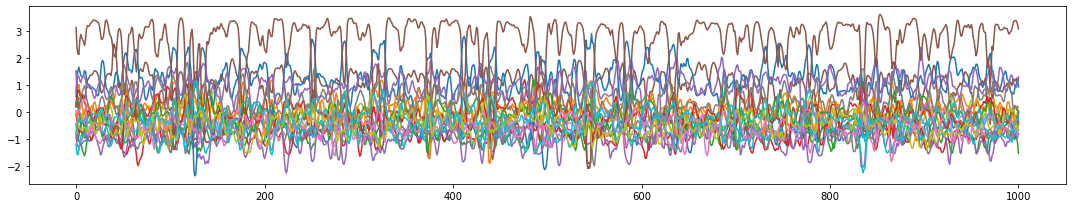

In [6]:
plt.figure(figsize=(15,3))
for observation in earData:
    plt.plot(observation, label=f'Observation {observation[0]}')
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve

<StemContainer object of 3 artists>

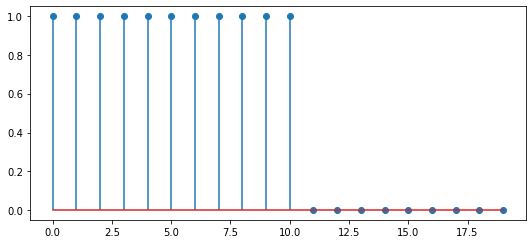

In [8]:
target = pd.read_csv('matlab_raman_preprocessed copy/earData.csv')['has_DM2']
target = np.array([int(x) for x in target])
plt.stem(target)

In [9]:
print(earData.shape)
print(earData[0].shape)
print(earData[0])

(20, 1001)
(1001,)
[-0.95674926 -1.0296264  -1.01785551 ... -0.70969695 -0.31305038
 -0.0153262 ]


In [10]:
sample_size = earData.shape[0] # number of samples in train set
time_steps  = earData.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

earData_reshaped = earData.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", earData_reshaped.shape)
print("1 Sample shape:\n",earData_reshaped[0].shape)
print("An example sample:\n", earData_reshaped[0])

After reshape train data set shape:
 (20, 1001, 1)
1 Sample shape:
 (1001, 1)
An example sample:
 [[-0.95674926]
 [-1.0296264 ]
 [-1.01785551]
 ...
 [-0.70969695]
 [-0.31305038]
 [-0.0153262 ]]


In [11]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
target_reshaped = target.reshape(target.shape[0],1,1)

In [13]:
def plot_model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

In [14]:
# Define Tensorboard as a Keras callback
tensorboard = TensorBoard(
  log_dir='.\logs',
  histogram_freq=1,
  write_images=True
)
keras_callbacks = [
  tensorboard
]

2022-06-03 18:36:41.806142: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-03 18:36:41.806160: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-03 18:36:41.811118: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [15]:
num_folds = 5
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = Adam(learning_rate=1e-4)
batch_size = 8
no_epochs = 2000
verbosity = 0
acc_per_fold = []
loss_per_fold = []

n_timesteps = earData_reshaped.shape[1] #13
n_features  = earData_reshaped.shape[2] #1 

model = keras.Sequential(name="model_conv1D")
model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
model.add(keras.layers.Conv1D(filters=100, kernel_size=10, activation='relu', name="Conv1D_1", kernel_regularizer=l2(0.05)))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(filters=50, kernel_size=5, activation='relu', name="Conv1D_2", kernel_regularizer=l2(0.05)))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation='relu', name="Dense_2"))
model.add(keras.layers.Dense(1, activation='sigmoid', name="Sigmoid"))


# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

# Fit data to model
history = model.fit(earData_reshaped, target_reshaped,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=1,
            validation_split=0.2,
            callbacks=EarlyStopping(monitor='val_loss', patience=150, verbose=0, mode='auto', restore_best_weights=True))



2022-06-03 18:36:43.805450: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-03 18:36:43.809703: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 992, 100)          1100      
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 988, 50)           25050     
_________________________________________________________________
flatten (Flatten)            (None, 49400)             0         
_________________________________________________________________
Dense_2 (Dense)              (None, 5)                 247005    
_________________________________________________________________
Sigmoid (Dense)              (None, 1)                 6         
Total params: 273,161
Trainable params: 273,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000


2022-06-03 18:36:45.296909: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-03 18:36:45.304873: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-03 18:36:45.941760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 423ms/step - loss: 4.1780 - accuracy: 0.3750 - val_loss: 4.1372 - val_accuracy: 0.0000e+00
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 4.1336 - accuracy: 0.6250

2022-06-03 18:36:50.351085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 31ms/step - loss: 4.1186 - accuracy: 0.7500 - val_loss: 4.1174 - val_accuracy: 0.2500
Epoch 3/2000
2/2 [==============================] - 0s 31ms/step - loss: 4.0833 - accuracy: 0.6875 - val_loss: 4.0954 - val_accuracy: 0.2500
Epoch 4/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.0601 - accuracy: 0.6875 - val_loss: 4.0694 - val_accuracy: 0.2500
Epoch 5/2000
2/2 [==============================] - 0s 32ms/step - loss: 4.0274 - accuracy: 0.6875 - val_loss: 4.0493 - val_accuracy: 0.2500
Epoch 6/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.0001 - accuracy: 0.6875 - val_loss: 4.0322 - val_accuracy: 0.2500
Epoch 7/2000
2/2 [==============================] - 0s 31ms/step - loss: 3.9723 - accuracy: 0.6875 - val_loss: 4.0177 - val_accuracy: 0.2500
Epoch 8/2000
2/2 [==============================] - 0s 27ms/step - loss: 3.9442 - accuracy: 0.6875 - val_loss: 4.0062 - val_accuracy: 0.2500
Epoch 9/2000
2/2 [========

In [16]:
model.evaluate(earData_reshaped, target_reshaped)

1/1 [==============================] - 0s 185ms/step - loss: 1.6193 - accuracy: 0.8500


[1.6193125247955322, 0.8500000238418579]

In [62]:
earData[train].reshape(18, 1001, -1)

NameError: name 'train' is not defined

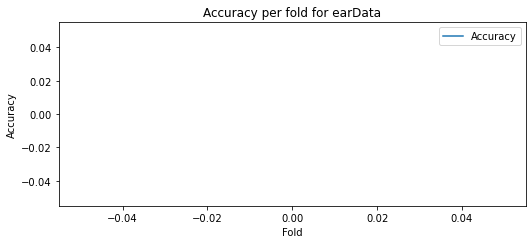

In [57]:
plt.plot(acc_per_fold)
plt.title(f'Accuracy per fold for {file_name}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.savefig(f'plot/nn_{file_name}.pdf', bbox_inches='tight')
plt.show()

In [17]:
def plot_history(history):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss for {file_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'plot/loss_{file_name}.pdf', bbox_inches='tight')
    plt.show()

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy for {file_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'plot/accuracy_{file_name}.pdf', bbox_inches='tight')
    plt.show()

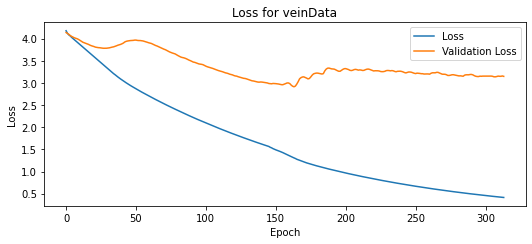

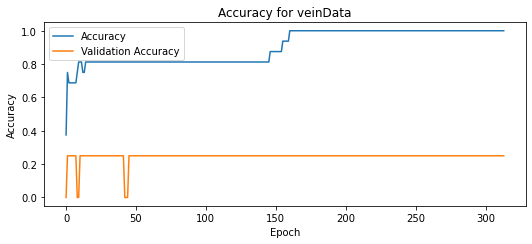

In [18]:
plot_history(history)

In [61]:
cross_val_score(model, earData_reshaped, target_reshaped, cv=RepeatedStratifiedKFold(n_splits=10, random_state=42), scoring='accuracy', n_jobs=-1)

ValueError: Found array with dim 3. Estimator expected <= 2.